In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
import nltk

In [3]:
df= pd.read_csv('Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df=df.head(500)
df.shape

(500, 10)

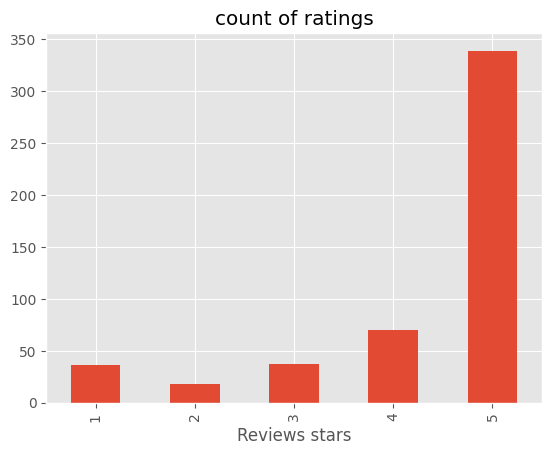

In [7]:
ax=df['Score'].value_counts().sort_index()\
    .plot(kind='bar',title='count of ratings')
ax.set_xlabel('Reviews stars')
plt.show()

In [8]:
example = df['Text'][27]
example

'I was so glad Amazon carried these batteries.  I have a hard time finding them elsewhere because they are such a unique size.  I need them for my garage door opener.<br />Great deal for the price.'

In [9]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['I', 'was', 'so', 'glad', 'Amazon', 'carried', 'these', 'batteries', '.', 'I']

In [10]:
tags=nltk.pos_tag(tokens)
tags[:10]

[('I', 'PRP'),
 ('was', 'VBD'),
 ('so', 'RB'),
 ('glad', 'JJ'),
 ('Amazon', 'NNP'),
 ('carried', 'VBD'),
 ('these', 'DT'),
 ('batteries', 'NNS'),
 ('.', '.'),
 ('I', 'PRP')]

In [11]:
entities =nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  I/PRP
  was/VBD
  so/RB
  glad/JJ
  (PERSON Amazon/NNP)
  carried/VBD
  these/DT
  batteries/NNS
  ./.
  I/PRP
  have/VBP
  a/DT
  hard/JJ
  time/NN
  finding/VBG
  them/PRP
  elsewhere/RB
  because/IN
  they/PRP
  are/VBP
  such/JJ
  a/DT
  unique/JJ
  size/NN
  ./.
  I/PRP
  need/VBP
  them/PRP
  for/IN
  my/PRP$
  garage/NN
  door/NN
  opener./IN
  </NNP
  br/NN
  //NNP
  >/NNP
  Great/NNP
  deal/NN
  for/IN
  the/DT
  price/NN
  ./.)


VADERR

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('this product is not good according to its price')

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.3412}

In [14]:
sia.polarity_scores(example)

{'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956}

In [15]:
# running the polarity test on the whole dataset

res = {}

for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid= row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [16]:
vaders =pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [17]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


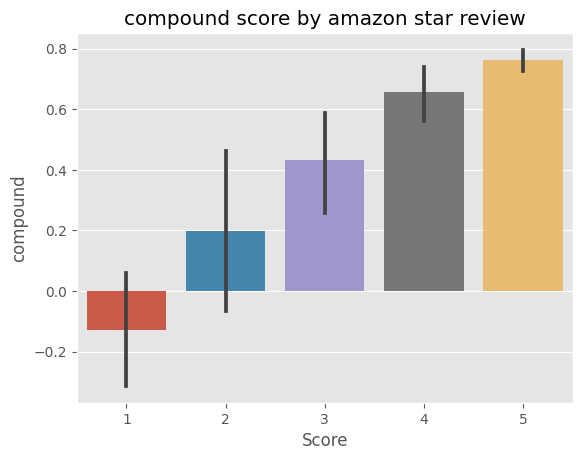

In [23]:
ax =sns.barplot(vaders,x='Score',y='compound')
ax.set_title('compound score by amazon star review')
plt.show()

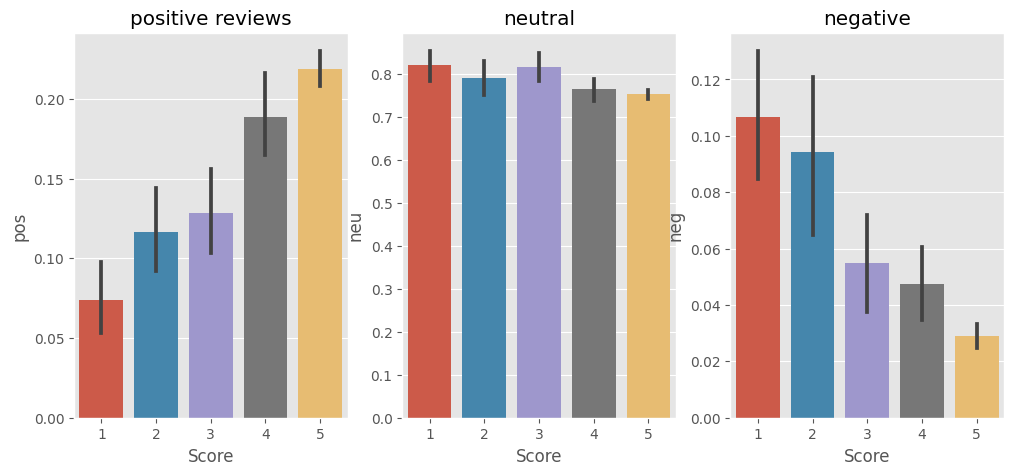

In [27]:
fig , axes = plt.subplots(1,3,figsize=(12,5))
sns.barplot(vaders,x='Score',y='pos',ax=axes[0])
sns.barplot(vaders,x='Score',y='neu',ax=axes[1])
sns.barplot(vaders,x='Score',y='neg',ax=axes[2])

axes[0].set_title('positive reviews')
axes[1].set_title('neutral')
axes[2].set_title('negative')

plt.show()

Roberta model